In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [6]:
df = pd.read_csv('application_train.csv')

In [7]:
df1 = df.loc[:, ['SK_ID_CURR', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN']]
df1.head()

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN
0,100002,M,N,Y,0
1,100003,F,N,N,0
2,100004,M,Y,Y,0
3,100006,F,N,Y,0
4,100007,M,N,Y,0


In [8]:
df1.isna().sum()

SK_ID_CURR         0
CODE_GENDER        0
FLAG_OWN_CAR       0
FLAG_OWN_REALTY    0
CNT_CHILDREN       0
dtype: int64

In [9]:
df2 = pd.read_csv('previous_application.csv')

In [10]:
df2 = df2.loc[:, ['SK_ID_CURR','NAME_CONTRACT_STATUS']]
df2.head()

,SK_ID_CURR,NAME_CONTRACT_STATUS
0,271877,Approved
1,108129,Approved
2,122040,Approved
3,176158,Approved
4,202054,Refused


In [11]:
df2.isna().sum()

SK_ID_CURR              0
NAME_CONTRACT_STATUS    0
dtype: int64

In [12]:
df3 = pd.merge(df1,df2, on = 'SK_ID_CURR', how='inner')
df3

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_CONTRACT_STATUS
0,100002,M,N,Y,0,Approved
1,100003,F,N,N,0,Approved
2,100003,F,N,N,0,Approved
3,100003,F,N,N,0,Approved
4,100004,M,Y,Y,0,Approved
...,...,...,...,...,...,...
1413696,456255,F,N,N,0,Approved
1413697,456255,F,N,N,0,Refused
1413698,456255,F,N,N,0,Refused
1413699,456255,F,N,N,0,Approved


In [13]:
df3.isna().sum()

SK_ID_CURR              0
CODE_GENDER             0
FLAG_OWN_CAR            0
FLAG_OWN_REALTY         0
CNT_CHILDREN            0
NAME_CONTRACT_STATUS    0
dtype: int64

In [14]:
df3.groupby('CODE_GENDER')['SK_ID_CURR'].count().to_frame().head()

,SK_ID_CURR
CODE_GENDER,
F,955139
M,458507
XNA,55


In [38]:
df3.groupby('NAME_CONTRACT_STATUS')['SK_ID_CURR'].count().to_frame().head()

,SK_ID_CURR
NAME_CONTRACT_STATUS,
Approved,886076


In [15]:
df31 = df3[(df3['CODE_GENDER']=='XNA')]
df31.head()

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_CONTRACT_STATUS
163754,141289,XNA,Y,Y,0,Approved
163755,141289,XNA,Y,Y,0,Refused
163756,141289,XNA,Y,Y,0,Approved
177193,144669,XNA,N,Y,2,Refused
177194,144669,XNA,N,Y,2,Approved


In [16]:
df3 = df3[df3.CODE_GENDER != 'XNA']
df3

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_CONTRACT_STATUS
0,100002,M,N,Y,0,Approved
1,100003,F,N,N,0,Approved
2,100003,F,N,N,0,Approved
3,100003,F,N,N,0,Approved
4,100004,M,Y,Y,0,Approved
...,...,...,...,...,...,...
1413696,456255,F,N,N,0,Approved
1413697,456255,F,N,N,0,Refused
1413698,456255,F,N,N,0,Refused
1413699,456255,F,N,N,0,Approved


In [17]:
df3.groupby('CODE_GENDER')['SK_ID_CURR'].count().to_frame().head()

,SK_ID_CURR
CODE_GENDER,
F,955139
M,458507


In [18]:
df3.head()

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_CONTRACT_STATUS
0,100002,M,N,Y,0,Approved
1,100003,F,N,N,0,Approved
2,100003,F,N,N,0,Approved
3,100003,F,N,N,0,Approved
4,100004,M,Y,Y,0,Approved


In [19]:
df3 = df3[(df3['NAME_CONTRACT_STATUS']=='Approved')]
df3

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_CONTRACT_STATUS
0,100002,M,N,Y,0,Approved
1,100003,F,N,N,0,Approved
2,100003,F,N,N,0,Approved
3,100003,F,N,N,0,Approved
4,100004,M,Y,Y,0,Approved
...,...,...,...,...,...,...
1413694,456255,F,N,N,0,Approved
1413695,456255,F,N,N,0,Approved
1413696,456255,F,N,N,0,Approved
1413699,456255,F,N,N,0,Approved


In [20]:
df3['CODE_GENDER'] = df3['CODE_GENDER'].replace(['M'], 1)
df3['CODE_GENDER'] = df3['CODE_GENDER'].replace(['F'], 0)
df3['FLAG_OWN_CAR'] = df3['FLAG_OWN_CAR'].replace(['Y'], 1)
df3['FLAG_OWN_CAR'] = df3['FLAG_OWN_CAR'].replace(['N'], 0)
df3['FLAG_OWN_REALTY'] = df3['FLAG_OWN_REALTY'].replace(['Y'], 1)
df3['FLAG_OWN_REALTY'] = df3['FLAG_OWN_REALTY'].replace(['N'], 0)
df3.head()

C:\Users\Khoirun Nisa\AppData\Local\Temp\ipykernel_11320\4183388707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['CODE_GENDER'] = df3['CODE_GENDER'].replace(['M'], 1)
C:\Users\Khoirun Nisa\AppData\Local\Temp\ipykernel_11320\4183388707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['CODE_GENDER'] = df3['CODE_GENDER'].replace(['F'], 0)
C:\Users\Khoirun Nisa\AppData\Local\Temp\ipykernel_11320\4183388707.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_CONTRACT_STATUS
0,100002,1,0,1,0,Approved
1,100003,0,0,0,0,Approved
2,100003,0,0,0,0,Approved
3,100003,0,0,0,0,Approved
4,100004,1,1,1,0,Approved


In [21]:
df4 = df3.loc[:, ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN']]
df4.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN
0,1,0,1,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,1,1,1,0


In [36]:
df4.dtypes

CODE_GENDER        int64
FLAG_OWN_CAR       int64
FLAG_OWN_REALTY    int64
CNT_CHILDREN       int64
dtype: object

In [22]:
#split dataset in features and target variable
feature_cols = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN']
X = df4[feature_cols] # Features
y = df4.CODE_GENDER # Target variable

In [23]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [24]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [25]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[115831,  33594],
       [ 30355,  41739]], dtype=int64)

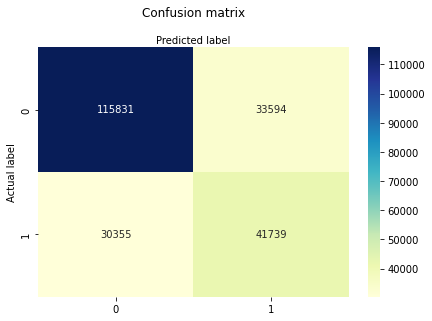

In [30]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
(0.5,257.44,'Predicted label');

In [ ]:
#laki laki atau perempuan, dengan memiliki mobil, anak dan rumah. pinjaman yang di Approved

In [37]:
from sklearn.metrics import classification_report
target_names = ['Laki Laki', 'Perempuan']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   Laki Laki       0.79      0.78      0.78    149425
   Perempuan       0.55      0.58      0.57     72094

    accuracy                           0.71    221519
   macro avg       0.67      0.68      0.67    221519
weighted avg       0.71      0.71      0.71    221519



In [32]:
#Accuracy Score
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7113159593533738

In [33]:
#Precision dan Recall

from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.5540599737166979

In [34]:
#F1 Score

from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.5662327796129609

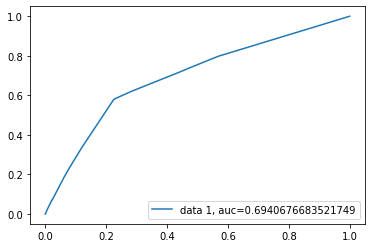

In [35]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()